In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'/Users/IshaanShah/Desktop/Personal Project 1'

In [3]:
spotify = pd.read_csv("spotify_clean.csv")

In [4]:
# Splitting into train and test datasets
for col in spotify.columns:
    print(col)

genre
artist_name
track_name
track_id
popularity
acousticness
danceability
energy
instrumentalness
key
liveness
loudness
mode
speechiness
tempo
time_signature
valence
duration_min
key_encoded
mode_encoded
time_signature_encoded
name_encoded
genre_encoded
is_popular


In [53]:
features_to_use = ["acousticness","danceability","energy","instrumentalness","key_encoded","liveness","loudness",
                  "mode_encoded","speechiness","tempo","time_signature_encoded","valence","duration_min","name_encoded"]
X = spotify[features_to_use]
Y = spotify["popularity"]

In [54]:
#train test validation split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.2, random_state = 1, shuffle = True)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(136483, 14)
(34121, 14)
(136483,)
(34121,)


# Lets create models now to predict a song's popularity
## Assessing a variety of models to select the most accurate one
### Regression models being looked at first

#### Linear Regression

In [56]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

In [57]:
print('Linear Regression: R^2 score on training set', linear.score(X_train, Y_train))
print('Linear Regression: R^2 score on test set', linear.score(X_test, Y_test))

Linear Regression: R^2 score on training set 0.20541384401961982
Linear Regression: R^2 score on test set 0.204264117778719


In [58]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(Y_test, linear.predict(X_test), squared = False))
print(cross_val_score(linear,X_train,Y_train,cv = 5).mean())


14.48812555538296
0.20519606762480852


R^2 score is pretty low, lets try using ridge and lasso regression to better estimate popularity

#### Lasso Regression

In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.05)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.05)

In [60]:
print('Lasso Regression: R^2 score on training set', lasso.score(X_train, Y_train))
print('Lasoo Regression: R^2 score on test set', lasso.score(X_test, Y_test))

Lasso Regression: R^2 score on training set 0.20519864903162288
Lasoo Regression: R^2 score on test set 0.2041798012128736


In [61]:
print(mean_squared_error(Y_test, lasso.predict(X_test), squared = False))
print(cross_val_score(lasso,X_train,Y_train,cv = 5).mean())

14.488893119509028
0.20498061105027338


The results are pretty similar, lets try optimizing the value of alpha to see if it brings about a change 

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha' : [0.001, 0.01, 0.1, 0.5, 1, 2, 10]}
best_lasso = GridSearchCV(Lasso(),param_grid,cv=5)
best_lasso.fit(X_train,Y_train)
print(best_lasso.best_params_)

{'alpha': 0.001}


In [63]:
best_lasso = Lasso(alpha = 0.001)
best_lasso.fit(X_train,Y_train)
print('Lasso Regression: R^2 score on training set', best_lasso.score(X_train, Y_train))
print('Lasoo Regression: R^2 score on test set', best_lasso.score(X_test, Y_test))

Lasso Regression: R^2 score on training set 0.20541375784697113
Lasoo Regression: R^2 score on test set 0.20426669414910414


Still no significant improvement, however we can still use the Lasso model to see the best predictors for popularity

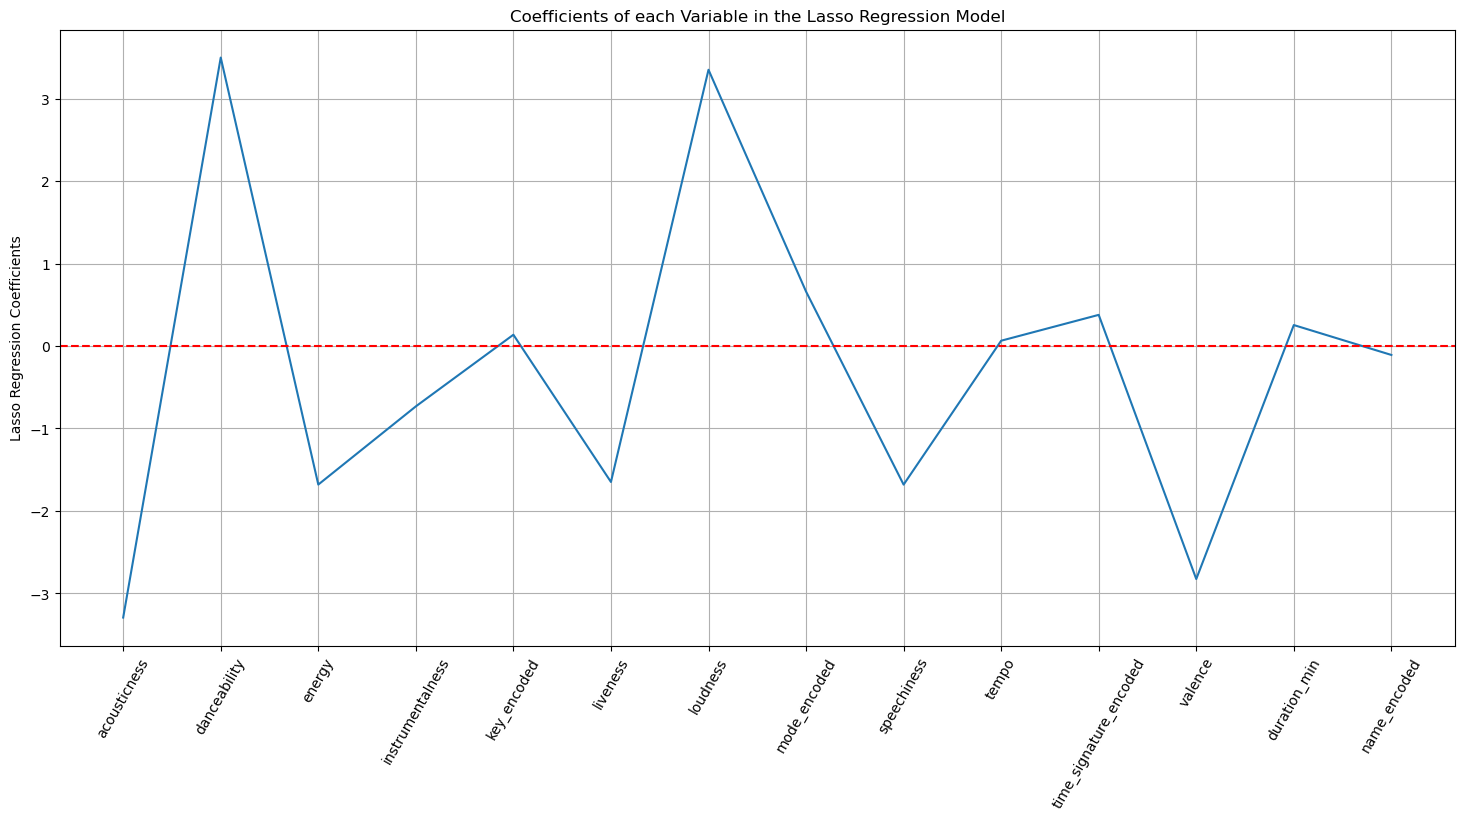

In [64]:
plt.figure(figsize=(18, 8))
plt.plot(range(len(X.columns)), best_lasso.coef_)
plt.axhline(y = 0, color = 'red', linestyle='dashed')
plt.xticks(range(len(X.columns)), X.columns, rotation = 60)
plt.ylabel("Lasso Regression Coefficients")
plt.title("Coefficients of each Variable in the Lasso Regression Model")
plt.grid()
plt.show()

We can see the best predictors are acousticness, danceability, energy, liveness, loudness, speechiness, and valence.  
We should keep this information in mind and can use it later to reduce the dimensions of the dataset.

#### Ridge Regression

In [65]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.05)
ridge.fit(X_train,Y_train)

Ridge(alpha=0.05)

In [66]:
print('Ridge Regression: R^2 score on training set', ridge.score(X_train, Y_train))
print('Ridge Regression: R^2 score on test set', ridge.score(X_test, Y_test))

Ridge Regression: R^2 score on training set 0.2054138440195562
Ridge Regression: R^2 score on test set 0.20426412149762108


In [67]:
print(mean_squared_error(Y_test, ridge.predict(X_test), squared = False))
print(cross_val_score(ridge,X_train,Y_train,cv = 5).mean())

14.488125521527556
0.20519606779920146


Still no real improvement, however we can try optimizing alpha again


In [68]:
best_ridge = GridSearchCV(Ridge(),param_grid,cv=5)
best_ridge.fit(X_train,Y_train)
print(best_ridge.best_params_)

{'alpha': 10}


In [69]:
best_ridge = Ridge(alpha = 10)
best_ridge.fit(X_train,Y_train)
print('Ridge Regression: R^2 score on training set', best_ridge.score(X_train, Y_train))
print('Ridge Regression: R^2 score on test set', best_ridge.score(X_test, Y_test))

Ridge Regression: R^2 score on training set 0.20541384147168018
Ridge Regression: R^2 score on test set 0.2042648587457223


Still no real improvement, however we can try optimizing alpha again

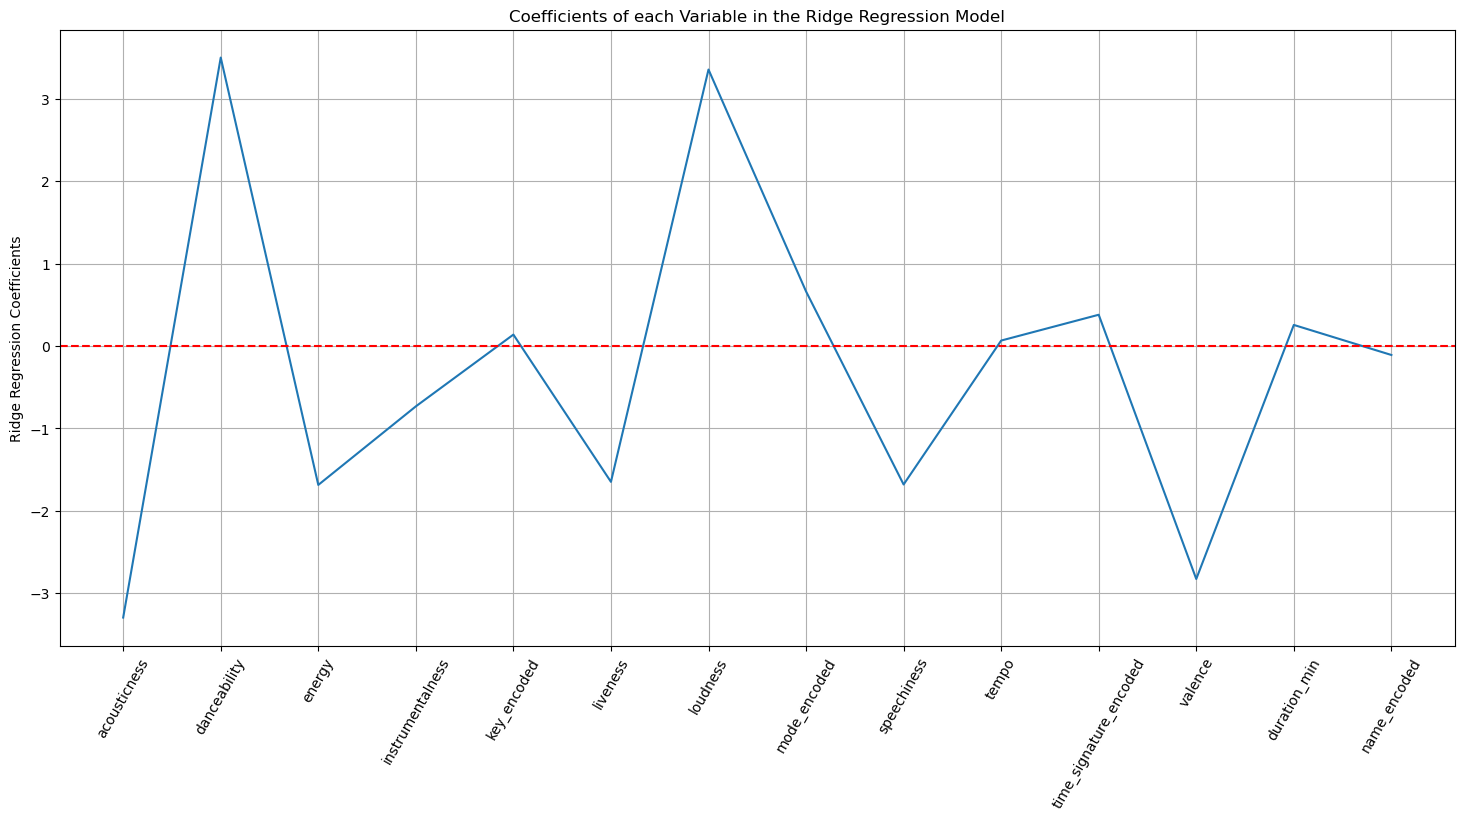

In [70]:
plt.figure(figsize=(18, 8))
plt.plot(range(len(X.columns)), best_ridge.coef_)
plt.axhline(y = 0, color = 'red', linestyle='dashed')
plt.xticks(range(len(X.columns)), X.columns, rotation = 60)
plt.ylabel("Ridge Regression Coefficients")
plt.title("Coefficients of each Variable in the Ridge Regression Model")
plt.grid()
plt.show()

In [71]:
((best_ridge.coef_)-(best_lasso.coef_)).mean()

-8.84423442492076e-05

Looks like the coefficients are pretty similar.

#### Trying something else

R^2 values are repeatedly low and this may be due to the fact that different genres have different features which makes them popular. Lets try breaking the training datasets into individual genres and see what the average R^2 value is.

In [76]:
grouped = spotify.groupby("genre")
training_score = []
test_score = []
results = pd.DataFrame()
for i in spotify["genre"].unique() : 
    df = grouped.get_group(i)
    df_X = df[features_to_use]
    df_Y = df["popularity"]
    df_X_scaled = scaler.fit_transform(df_X)
    df_X_train,df_X_test,df_Y_train,df_Y_test = train_test_split(df_X_scaled,df_Y,test_size = 0.2, random_state = 1, shuffle = True)
    lasso.fit(df_X_train, df_Y_train)
    training_score.append(lasso.score(df_X_train, df_Y_train))
    test_score.append(lasso.score(df_X_test, df_Y_test))

In [77]:
results["genre"] = spotify["genre"].unique()
results["training_r^2"] = training_score
results["test_r^2"] = test_score
print(results)
print("Training Score mean: ", sum(training_score)/len(training_score))
print("Test Score mean: ", sum(test_score)/len(test_score))

               genre  training_r^2  test_r^2
0              Movie      0.053903  0.037458
1                R&B      0.010296  0.005288
2          A Capella      0.274362 -0.732960
3        Alternative      0.018425  0.014416
4            Country      0.013902  0.014480
5              Dance      0.042057  0.020605
6         Electronic      0.024438  0.014585
7              Anime      0.082915  0.068057
8               Folk      0.018028  0.011015
9              Blues      0.020891  0.010562
10             Opera      0.040390  0.009227
11           Hip-Hop      0.041813  0.029587
12  Children’s Music      0.533301  0.521500
13               Rap      0.081200  0.071804
14             Indie      0.065580  0.052663
15         Classical      0.097224  0.101697
16               Pop      0.037690  0.044465
17            Reggae      0.017394  0.002597
18         Reggaeton      0.070741  0.057206
19              Jazz      0.047145  0.042042
20              Rock      0.024199 -0.001233
21        

Linear Regression and its variants were not great at predicting popularity. Lets try some other regression models

#### Gradient Boosting Regressor

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [92]:
print('Gradient Boosting Regression: R^2 score on training set', gbr.score(X_train, Y_train))
print('Gradient Boosting Regression: R^2 score on test set', gbr.score(X_test, Y_test))

Gradient Boosting Regression: R^2 score on training set 0.32319045959495085
Gradient Boosting Regression: R^2 score on test set 0.3161949861554657


In [106]:
print(mean_squared_error(Y_test, gbr.predict(X_test), squared = False))
cv = cross_val_score(gbr,X_train,Y_train,cv = 2)
print(cv.mean())

13.430552234951854
0.31415457645921624


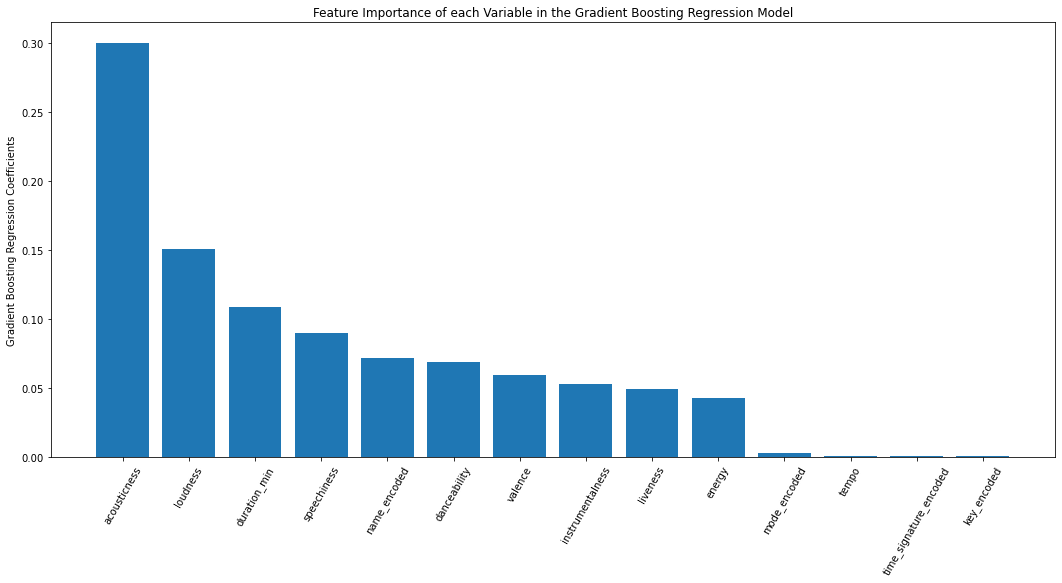

In [105]:
plt.figure(figsize=(18, 8))
df = pd.DataFrame({"Columns":X.columns, "Importances": gbr.feature_importances_})
df = df.sort_values("Importances", ascending = False)
plt.bar(df.Columns,df.Importances)
plt.xticks(df.Columns, rotation = 60)
plt.ylabel("Gradient Boosting Regression Coefficients")
plt.title("Feature Importance of each Variable in the Gradient Boosting Regression Model")
plt.show()

Gradient Boosting is a very computationally expensive model and running this model was extremely time consuming 

#### Support Vector Regression

In [26]:
#Using SVR
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(X_train,Y_train)

SVR(kernel='linear')

In [27]:
svr.score(X_train,Y_train)

0.20114830884455603

#### Random Forest Regression

In [28]:
#Using random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [29]:
rf.score(X_train,Y_train)

0.9116856225612199

In [30]:
rf.score(X_test,Y_test)

0.371665066946852

This looks like a case of overfitting. Random Forests were also computationally expensive on such a large dataset

In [31]:
print(mean_squared_error(Y_test, rf.predict(X_test), squared = False))

12.87429133424493


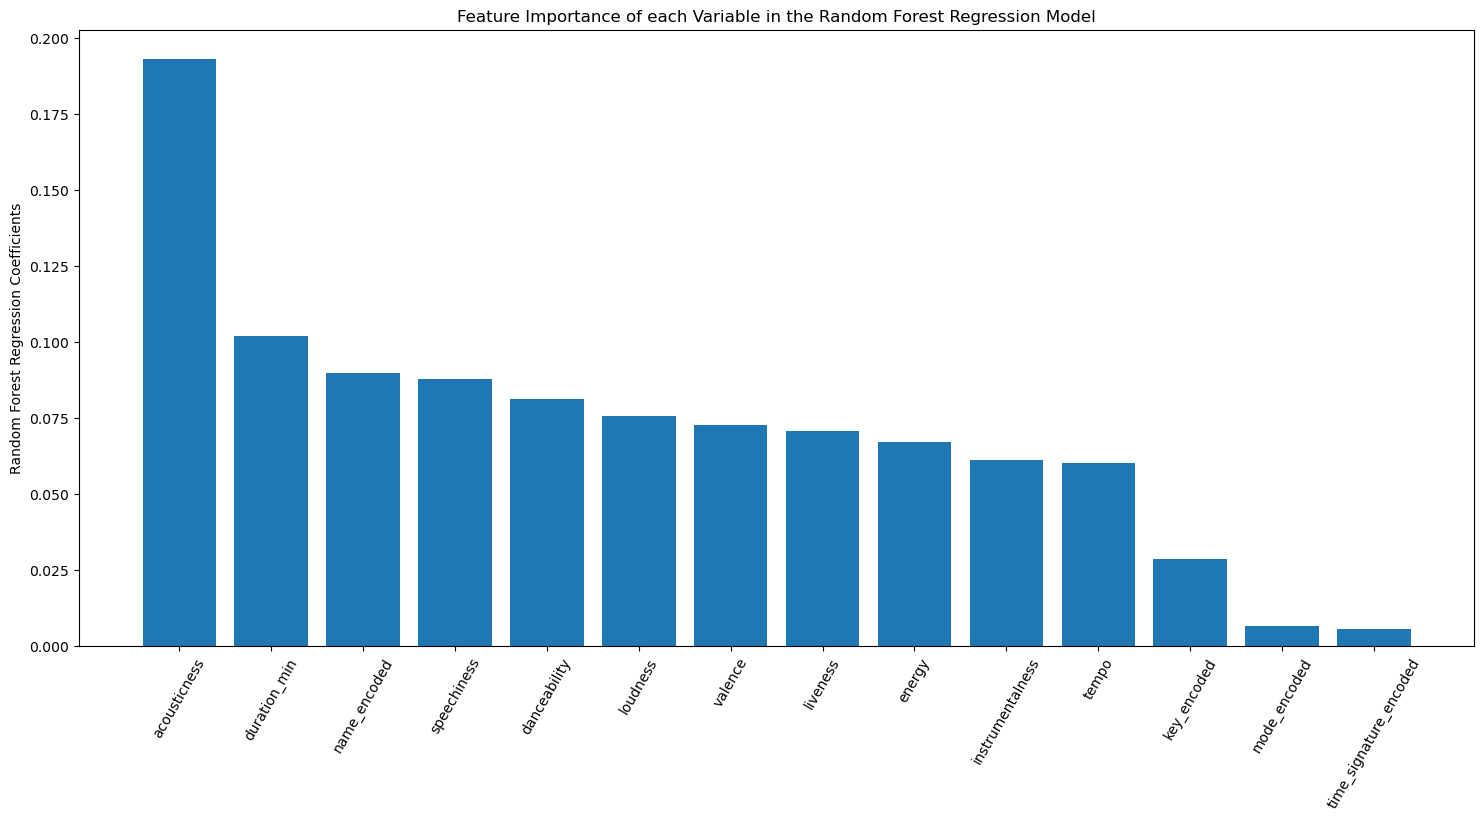

In [32]:
plt.figure(figsize=(18, 8))
df = pd.DataFrame({"Columns":X.columns, "Importances": rf.feature_importances_})
df = df.sort_values("Importances", ascending = False)
plt.bar(df.Columns,df.Importances)
plt.xticks(df.Columns, rotation = 60)
plt.ylabel("Random Forest Regression Coefficients")
plt.title("Feature Importance of each Variable in the Random Forest Regression Model")
plt.show()

Regression doesn't look like it will help us predict a songs popularity. Lets try classification with the is_popular as our predictor

## Classification
We didn't get great results with regression, so lets try predicting popularity through classification. 

In [ ]:
1-(spotify.is_popular.sum()/spotify.shape[0])

We see that the dataset is imbalanced as ~ 90% of observations belong to one class and ~10% of observations belong to the other class. This will lead to poor results as shown below.

In [75]:
Y_classifier = spotify["is_popular"]
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(X_scaled,Y_classifier,test_size = 0.1, random_state = 1, shuffle = True)

0.9015298048180059


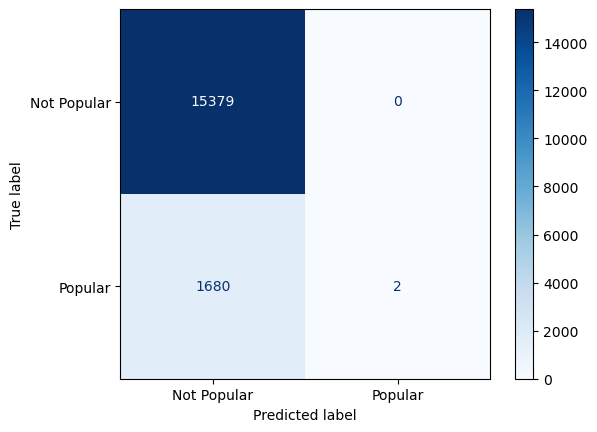

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
logreg = LogisticRegression()
logreg.fit(X_train_1, Y_train_1)
y_pred = logreg.predict(X_test_1)
print(accuracy_score(Y_test_1, y_pred))
cm = confusion_matrix(Y_test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Popular", "Popular"])
disp.plot(cmap = plt.cm.Blues)
plt.show()

We see that even though our accuracy score is so high, it is because the model predicts only the not popular class. This happens as the dataset is imbalanced. As our dataset is large, lets undersample the data, i.e. use the same number of not popular and popular observations. 

In [77]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_2, Y_train_2 = rus.fit_resample(X_train_1, Y_train_1)

Accuracy Score:  0.5864251802356251
Precision Score:  0.16395697848924462
Recall Score:  0.7794292508917955


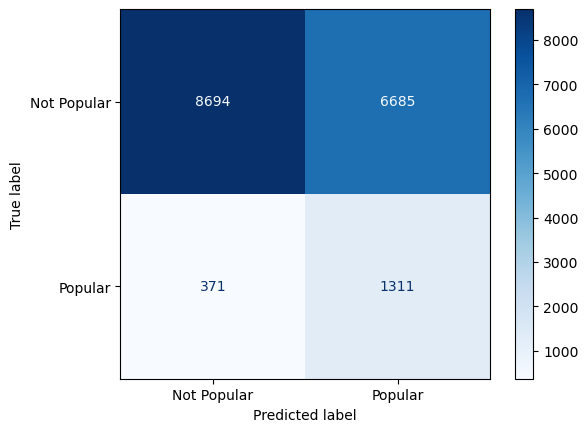

In [78]:
logreg_under = LogisticRegression()
logreg_under.fit(X_train_2, Y_train_2)
y_pred = logreg_under.predict(X_test_1)
print("Accuracy Score: ", accuracy_score(Y_test_1, y_pred))
print("Precision Score: ",precision_score(Y_test_1, y_pred))
print("Recall Score: ",recall_score(Y_test_1, y_pred))
cm = confusion_matrix(Y_test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Popular", "Popular"])
disp.plot(cmap = plt.cm.Blues)
plt.show()

Lets experiment with more models to see which can give us the best results

Accuracy Score:  0.6506652599495927
Precision Score:  0.18590308370044054
Recall Score:  0.7526753864447087


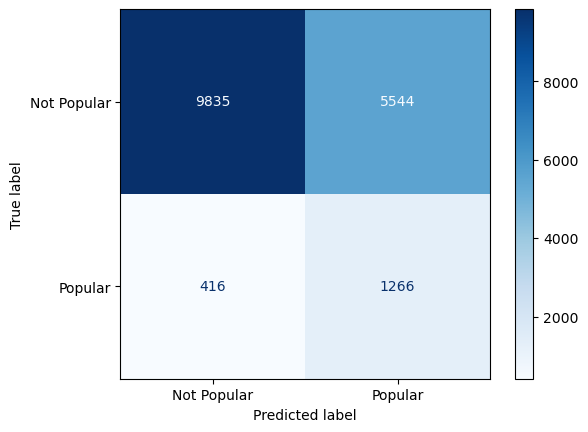

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_2, Y_train_2)
y_pred = rfc.predict(X_test_1)
print("Accuracy Score: ", accuracy_score(Y_test_1, y_pred))
print("Precision Score: ",precision_score(Y_test_1, y_pred))
print("Recall Score: ",recall_score(Y_test_1, y_pred))
cm = confusion_matrix(Y_test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Popular", "Popular"])
disp.plot(cmap = plt.cm.Blues)
plt.show()

/Users/IshaanShah/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:48:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score:  0.6586366567024208
Precision Score:  0.1922734026745914
Recall Score:  0.7693222354340071


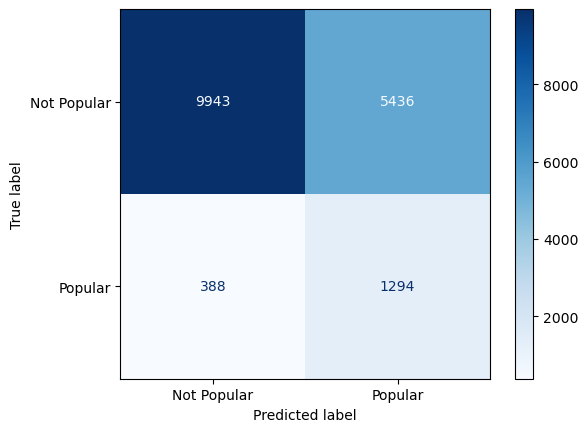

In [80]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_2, Y_train_2)
y_pred = xgb.predict(X_test_1)
print("Accuracy Score: ", accuracy_score(Y_test_1, y_pred))
print("Precision Score: ",precision_score(Y_test_1, y_pred))
print("Recall Score: ",recall_score(Y_test_1, y_pred))
cm = confusion_matrix(Y_test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Popular", "Popular"])
disp.plot(cmap = plt.cm.Blues)
plt.show()

Accuracy Score:  0.590059199343532
Precision Score:  0.15533350635868154
Recall Score:  0.7116527942925089


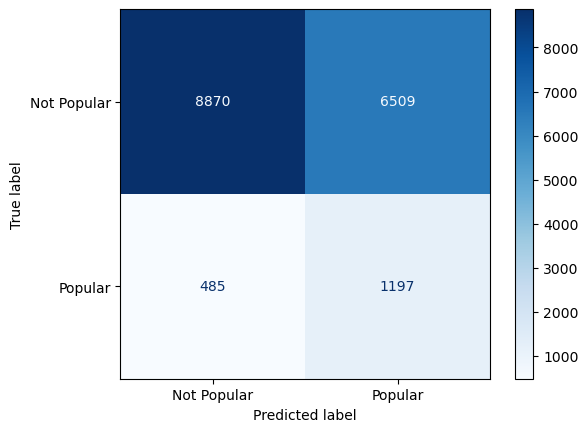

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_2, Y_train_2)
y_pred = knn.predict(X_test_1)
print("Accuracy Score: ", accuracy_score(Y_test_1, y_pred))
print("Precision Score: ",precision_score(Y_test_1, y_pred))
print("Recall Score: ",recall_score(Y_test_1, y_pred))
cm = confusion_matrix(Y_test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Popular", "Popular"])
disp.plot(cmap = plt.cm.Blues)
plt.show()

Accuracy Score:  0.5601664615204267
Precision Score:  0.16486299792769973
Recall Score:  0.8513674197384067


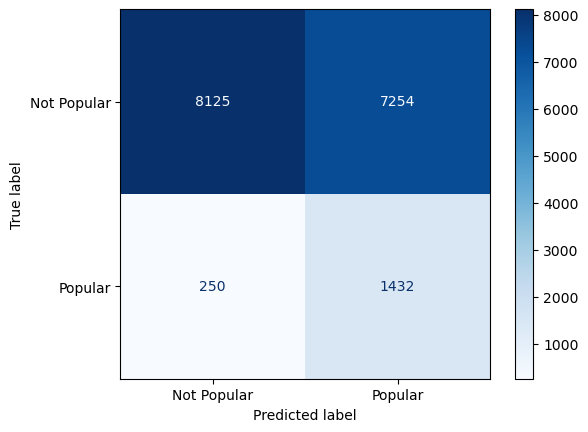

In [82]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_2, Y_train_2)
y_pred = svc.predict(X_test_1)
print("Accuracy Score: ", accuracy_score(Y_test_1, y_pred))
print("Precision Score: ",precision_score(Y_test_1, y_pred))
print("Recall Score: ",recall_score(Y_test_1, y_pred))
cm = confusion_matrix(Y_test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Popular", "Popular"])
disp.plot(cmap = plt.cm.Blues)
plt.show()

Accuracy Score:  0.6155559463102983
Precision Score:  0.1505946410660553
Recall Score:  0.6248513674197385


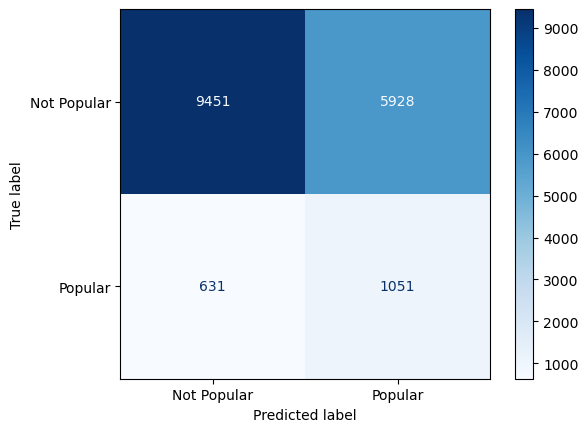

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_2, Y_train_2)
y_pred = dtc.predict(X_test_1)
print("Accuracy Score: ", accuracy_score(Y_test_1, y_pred))
print("Precision Score: ",precision_score(Y_test_1, y_pred))
print("Recall Score: ",recall_score(Y_test_1, y_pred))
cm = confusion_matrix(Y_test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Popular", "Popular"])
disp.plot(cmap = plt.cm.Blues)
plt.show()

We can see our best performing models were the Random Forest Classifier, XGBoost Classifier, and the Decision Tree Classifier. Lets optimize the parameters of these models and try creating an ensemble to boost the metrics.

In [94]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [95]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {"n_estimators": n_estimators, "max_features":max_features,
               "max_depth":max_depth,
               "min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 50, cv = 3, verbose=3, random_state=1, n_jobs = -1)
rf_random.fit(X_train_2, Y_train_2)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 28.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=1, verbose=3)

{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}
Accuracy Score:  0.6446867123849715
Precision Score:  0.18606651376146788
Recall Score:  0.7717003567181926


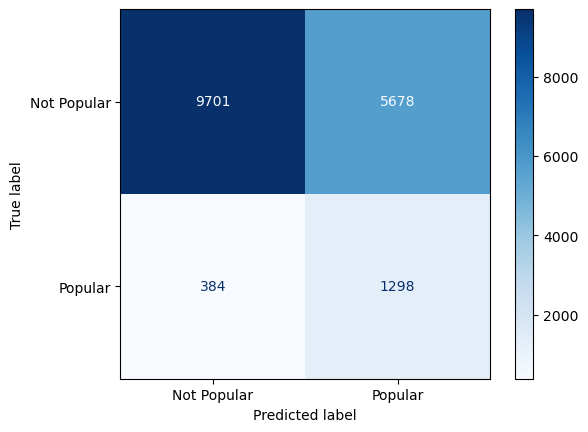

In [101]:
print(rf_random.best_params_)
best_rf = rf_random.best_estimator_
best_rf.fit(X_train_2, Y_train_2)
y_pred = best_rf.predict(X_test_1)
print("Accuracy Score: ", accuracy_score(Y_test_1, y_pred))
print("Precision Score: ",precision_score(Y_test_1, y_pred))
print("Recall Score: ",recall_score(Y_test_1, y_pred))
cm = confusion_matrix(Y_test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Popular", "Popular"])
disp.plot(cmap = plt.cm.Blues)
plt.show()

In [102]:
print(dtc.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [110]:
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(1, 100, num = 5)]
min_samples_split = range(1,10)
min_samples_leaf = range(1,10)
grid = {"criterion": criterion,
               "max_depth":max_depth,
               "min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}
dtc_grid = GridSearchCV(estimator = dtc, param_grid = random_grid, 
                               cv = 3, verbose=3, n_jobs = -1)
dtc_grid.fit(X_train_2, Y_train_2)

Fitting 3 folds for each of 810 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 1016 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  2.2min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 25, 50, 75, 100],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             verbose=3)

{'min_samples_split': 8, 'min_samples_leaf': 9, 'max_depth': 25, 'criterion': 'entropy'}
Accuracy Score:  0.640525174374304
Precision Score:  0.16131486836098005
Recall Score:  0.6302021403091558


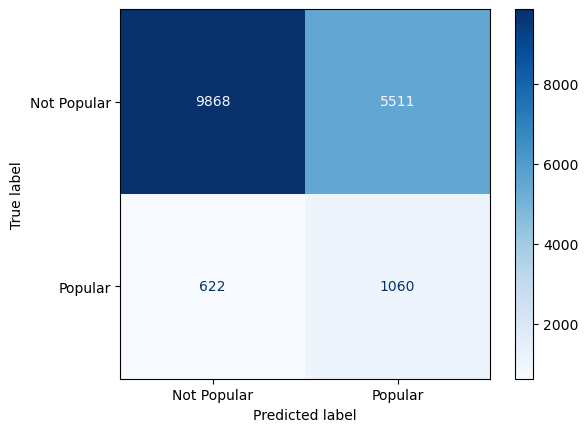

In [111]:
print(dtc_random.best_params_)
best_dtc = dtc_random.best_estimator_
best_dtc.fit(X_train_2, Y_train_2)
y_pred = best_dtc.predict(X_test_1)
print("Accuracy Score: ", accuracy_score(Y_test_1, y_pred))
print("Precision Score: ",precision_score(Y_test_1, y_pred))
print("Recall Score: ",recall_score(Y_test_1, y_pred))
cm = confusion_matrix(Y_test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Popular", "Popular"])
disp.plot(cmap = plt.cm.Blues)
plt.show()

In [112]:
print(xgb.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [115]:
max_depth = [int(x) for x in np.linspace(1, 100, num = 5)]
min_child_weight = range(1,6,2)
gamma = [i/10.0 for i in range(0,5)]
subsample = [i/10.0 for i in range(6,10)]
colsample_bytree = [i/10.0 for i in range(6,10)]
random_grid = {"min_child_weight": min_child_weight, "gamma":gamma,
               "max_depth":max_depth,
               "subsample":subsample,"colsample_bytree":colsample_bytree}
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, 
                               n_iter = 50, cv = 3, verbose=3, random_state=1, n_jobs = -1)
xgb_random.fit(X_train_2, Y_train_2)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.8min finished
/Users/IshaanShah/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:29:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_pa...om_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_we

{'subsample': 0.9, 'min_child_weight': 1, 'max_depth': 100, 'gamma': 0.3, 'colsample_bytree': 0.8}
[14:31:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score:  0.665728855283981
Precision Score:  0.19130968831567635
Recall Score:  0.7407847800237812


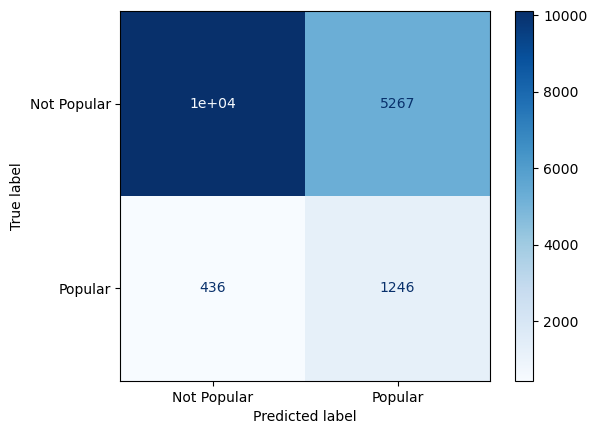

In [116]:
print(xgb_random.best_params_)
best_xgb = xgb_random.best_estimator_
best_xgb.fit(X_train_2, Y_train_2)
y_pred = best_xgb.predict(X_test_1)
print("Accuracy Score: ", accuracy_score(Y_test_1, y_pred))
print("Precision Score: ",precision_score(Y_test_1, y_pred))
print("Recall Score: ",recall_score(Y_test_1, y_pred))
cm = confusion_matrix(Y_test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Popular", "Popular"])
disp.plot(cmap = plt.cm.Blues)
plt.show()

We can see each of these models have a different strength:  
XGboost has the highest precision, while Random Forest has the highest recall. Lets see if creating an ensemble will help them improve

In [148]:
from sklearn.ensemble import StackingClassifier
level0 = list()
level0.append(('rf', best_rf))
level0.append(('dtc', best_dtc))
level1 = best_xgb
model = StackingClassifier(estimators=level0, final_estimator= level1, cv = 3)
model.fit(X_train_2,Y_train_2)

/Users/IshaanShah/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:34:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=3,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=40,
                                                       max_features='sqrt',
                                                       min_samples_leaf=2,
                                                       min_samples_split=5,
                                                       n_estimators=1200)),
                               ('dtc',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=25,
                                                       min_samples_leaf=9,
                                                       min_samples_split=8))],
                   final_estimator=XGBClassifier(base_score...
    

Accuracy Score:  0.6300334095305081
Precision Score:  0.15683367921731398
Recall Score:  0.629013079667063


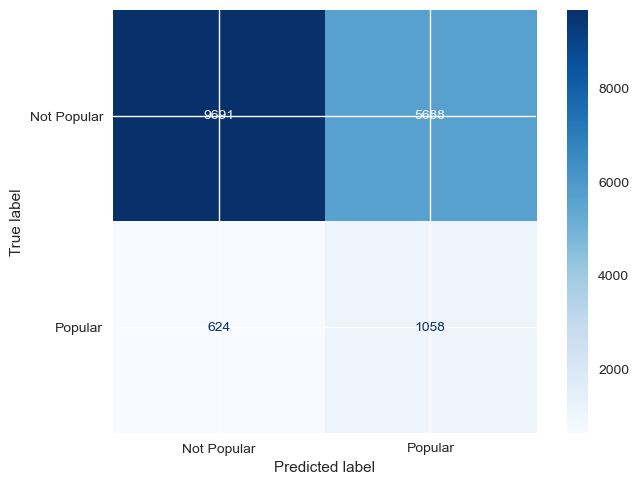

In [149]:
y_pred = model.predict(X_test_1)
print("Accuracy Score: ", accuracy_score(Y_test_1, y_pred))
print("Precision Score: ",precision_score(Y_test_1, y_pred))
print("Recall Score: ",recall_score(Y_test_1, y_pred))
cm = confusion_matrix(Y_test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Popular", "Popular"])
disp.plot(cmap = plt.cm.Blues)
plt.show()

In [150]:
from sklearn.metrics import roc_auc_score, roc_curve
pred_proba = model.predict_proba(X_test_1)
pred_proba_1 = best_xgb.predict_proba(X_test_1)
fpr, tpr, thresh = roc_curve(Y_test_1, pred_proba[:,1], pos_label=1)
fpr_1, tpr_1, thresh_1 = roc_curve(Y_test_1, pred_proba_1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test_1))]
p_fpr, p_tpr, _ = roc_curve(Y_test_1, random_probs, pos_label=1)
auc_score = roc_auc_score(Y_test_1, pred_proba[:,1])
auc_score_1 = roc_auc_score(Y_test_1, pred_proba_1[:,1])

print(auc_score, auc_score_1)

0.7015919758393145 0.7772120072934825


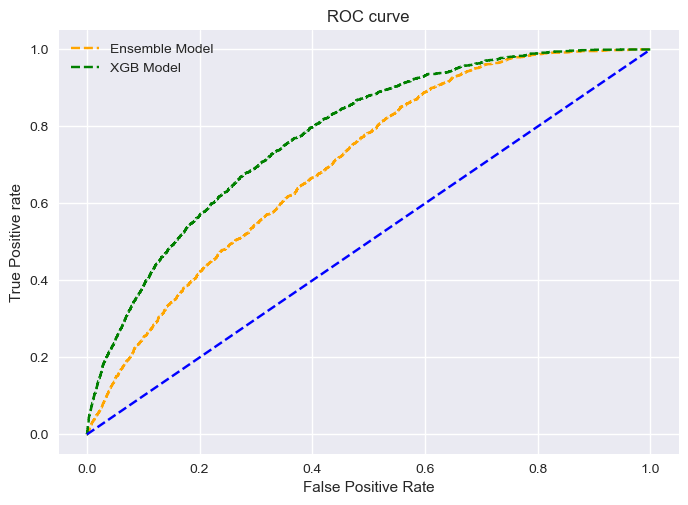

In [151]:
plt.style.use('seaborn')


# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Ensemble Model')
plt.plot(fpr_1, tpr_1, linestyle='--',color='green', label='XGB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

## Almost Conclusion

To conclude, it looks like predicting a song's popularity on Spotify isn't as easy as we think it is. From the results above it seems there are probably a lot more factors that go into a song's popularity or a song's popularity is more random than we think it is. While regression wasn't succesful in predicting popularity, it looks like classification did a better job. Based on the AUC score, accuracy, precision and recall, the best model was the `XGB Classifier` with some hyperparameter tuning done.  

## Using KNearest Neighbours to make a song and artist recommender

I thought this would be a fun little side task to do with the given dataset

In [165]:
from sklearn.neighbors import NearestNeighbors
features_to_use = ["acousticness","danceability","energy","instrumentalness","key_encoded","liveness","loudness",
                   "speechiness","tempo","valence","duration_min","popularity"]
df_use = spotify
df_use[features_to_use] = scaler.fit_transform(df_use[features_to_use])
df_neighbours = df_use[features_to_use]

In [167]:
df_song = df_use.loc[(spotify['track_name']=='The Hills') & (spotify['artist_name']=='The Weeknd')]
df_song = df_song[features_to_use]
neighbours = NearestNeighbors (n_neighbors= 10).fit(df_neighbours)
distances, indices = neighbours.kneighbors(df_song)
output = spotify[["track_name", "artist_name", "genre"]].iloc[indices[0]]
output.iloc[1:,]

,track_name,artist_name,genre
13268,What About Us,P!nk,Dance
60767,Broken Smile (My All),Lil Peep,Hip-Hop
13395,Adore You,Miley Cyrus,Dance
60761,16 Lines,Lil Peep,Hip-Hop
166796,Against All Odds (Take a Look at Me Now) - 201...,Phil Collins,Rock
60362,Selfish,PnB Rock,Hip-Hop
84185,No One,Alicia Keys,Pop
13394,Middle,DJ Snake,Dance
60376,Say It,Tory Lanez,Hip-Hop


In [192]:
def recommender(song_name, artist_name, number_of_songs) :
        df_song = df_use.loc[(df_use['track_name']== song_name) & (spotify['artist_name']== artist_name)]
        df_song = df_song[features_to_use]
        neighbours = NearestNeighbors (n_neighbors= (number_of_songs+1)).fit(df_neighbours)
        distances, indices = neighbours.kneighbors(df_song)
        output = df_use[["track_name", "artist_name", "genre"]].iloc[indices[0]].reset_index().drop("index",axis = 1)
        return(output.iloc[1:,])

In [193]:
recommender("Robbery","Juice WRLD",10)

,track_name,artist_name,genre
1,Look Back At It,A Boogie Wit da Hoodie,Rap
2,"These Days (feat. Jess Glynne, Macklemore & Da...",Rudimental,Dance
3,Rise,Jonas Blue,Dance
4,Thinking Out Loud,Ed Sheeran,Pop
5,"thank u, next",Ariana Grande,Dance
6,La Player (Bandolera),Zion & Lennox,Hip-Hop
7,Adictiva,Daddy Yankee,Hip-Hop
8,She Will Be Loved - Radio Mix,Maroon 5,Pop
9,Mama (feat. Ellie Goulding),Clean Bandit,Dance
10,Starving,Hailee Steinfeld,Dance


In [195]:
recommender("The Hills","The Weeknd",4)

,track_name,artist_name,genre
1,What About Us,P!nk,Dance
2,Broken Smile (My All),Lil Peep,Hip-Hop
3,Adore You,Miley Cyrus,Dance
4,16 Lines,Lil Peep,Hip-Hop


In [196]:
recommender("SICKO MODE","Travis Scott",5)

,track_name,artist_name,genre
1,goosebumps,Travis Scott,Rap
2,New Patek,Lil Uzi Vert,Rap
3,Black & White,Juice WRLD,Rap
4,No Stylist,French Montana,Hip-Hop
5,Culpables,Karol G,Reggaeton


In [199]:
recommender("In the Name of Love","Martin Garrix",6)

,track_name,artist_name,genre
1,Dangerous Woman,Ariana Grande,Dance
2,Call Out My Name,The Weeknd,Rap
3,Save That Shit,Lil Peep,Hip-Hop
4,You Can Cry,Marshmello,Pop
5,Solid,Trey Songz,Dance
6,Every Rose Has Its Thorn - Remastered 2003,Poison,Rock


Made an aritst recommender too as it is tough to find the exact song name

In [190]:
#Artist Reccommender
df_artist = df_use.groupby("artist_name").mean().reset_index()
df_artist_neighbours = df_artist[features_to_use]
def artist_recommender(artist_name, number_of_artists) :
        df_artist_ = df_artist.loc[df_artist['artist_name']== artist_name]
        df_artist_ = df_artist_[features_to_use]
        neighbours = NearestNeighbors (n_neighbors= (number_of_artists)).fit(df_artist_neighbours)
        distances, indices = neighbours.kneighbors(df_artist_)
        output = df_use[["artist_name"]].iloc[indices[0]].reset_index()
        output.drop("index", axis = 1,inplace = True)
        return(output)

In [191]:
artist_recommender("The Weeknd", 5)

,artist_name
0,Majid Jordan
1,Carrie Underwood
2,Clay Walker
3,Frank Ocean
4,Rascal Flatts


In [200]:
artist_recommender("Post Malone", 10)

,artist_name
0,The Dead Milkmen
1,Kenny Chesney
2,Atreyu
3,Sturgill Simpson
4,Chris Young
5,Aphex Twin
6,Weezer
7,Joji
8,Disturbed
9,Sum 41


In [202]:
artist_recommender("Bad Bunny", 2)

,artist_name
0,Berhana
1,3 Doors Down


In [203]:
artist_recommender("XXXTENTACION", 5)

,artist_name
0,Calvin Harris
1,Pixies
2,C.W. McCall
3,Bazzi
4,Kenny Chesney


## The conclusion - (Finally)